In [1]:
import numpy as np
import torch as t

from PIL import Image as im

In [2]:
def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img

In [3]:
def visualize_feats(input, verbose=False):
    
    output = input.reshape(-1, 64)
    
    # scale to uint8
    # output = output / output.max() #normalizes data in range 0 - 255
    # output = 255 * output
    # img = output.astype(np.uint8)
    img = convert(output, 0, 255, np.uint8)
    
    # debug stats fun
    if verbose:
        print(f'Input shape: {input.shape}')
        print(f'Output shape: {output.shape}')
        print(f'Output max {output.max()} min {output.min()}')
    
    return im.fromarray(img)

In [4]:
!pwd

/tmpssd/dev/revisit-mmt/notebooks


In [5]:
# Load English ref
with open('../data/multi30k-en-de/train.en') as file:
    train_en = [line.rstrip() for line in file]

print(f'Read {len(train_en)} lines')

Read 29000 lines


In [6]:
# Load visual features
# vis feats in one file, so multi30k train is 1-29000, val, test sets follow

base_res50_feats = np.load('../features/resnet50-avgpool.npy')
print(f'Shape: {base_res50_feats.shape}')

Shape: (32475, 2048)


Input shape: (2048,)
Output shape: (32, 64)
Output max 3.833984375 min 0.0


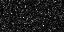

In [7]:
test = visualize_feats(base_res50_feats[0], verbose=True)
test

In [19]:
# scale_test = test.thumbnail( (512,512) ) # method takes a tuple
scale_test = test.resize( (512, 256), resample=im.NEAREST ) # method takes a tuple

In [20]:
type(scale_test)

PIL.Image.Image

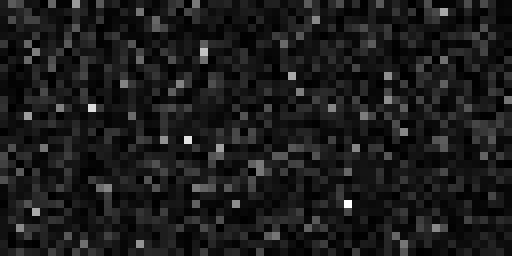

In [21]:
scale_test